# 1 Data Exploration
    a. Explore the dataset by displaying the first few rows, summary statistics, and data types of each column.
    b. Identify missing values, outliers, and unique values in categorical columns.

## 1.1 store sales
### 1.1.a Explore the dataset



In [128]:
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder

#### Oil

In [129]:
# 1. Overview



oil_df = pd.read_csv("oil.csv", names=["date", "oil_price"], header=0, parse_dates=["date"])

print("=== Head: ===")
print(oil_df.head())

print("=== Info: ===")
print(oil_df.info())

print("=== Description: ===")
print(oil_df.describe())

=== Head: ===
        date  oil_price
0 2013-01-01        NaN
1 2013-01-02      93.14
2 2013-01-03      92.97
3 2013-01-04      93.12
4 2013-01-07      93.20
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1218 non-null   datetime64[ns]
 1   oil_price  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB
None
=== Description: ===
                      date    oil_price
count                 1218  1175.000000
mean   2015-05-02 12:00:00    67.714366
min    2013-01-01 00:00:00    26.190000
25%    2014-03-03 06:00:00    46.405000
50%    2015-05-02 12:00:00    53.190000
75%    2016-06-30 18:00:00    95.660000
max    2017-08-31 00:00:00   110.620000
std                    NaN    25.630476


In [130]:
print("=== Time Period: ===")
print("Begin:", oil_df["date"].min(), "\nEnd:", oil_df["date"].max())
print("Tage insgesamt:", oil_df["date"].nunique())

=== Time Period: ===
Begin: 2013-01-01 00:00:00 
End: 2017-08-31 00:00:00
Tage insgesamt: 1218


#### holiday

In [153]:
holidays_df = pd.read_csv("holidays_events.csv",
                          names=["date", "type", "local", "local-name", "description", "transferred", ],
                          header=0, parse_dates=["date"])

print("=== Head: ===")
print(holidays_df.head())

print("=== Info: ===")
print(holidays_df.info())

print("=== Description: ===")
print(holidays_df.describe())

=== Head: ===
        date     type     local local-name                    description  \
0 2012-03-02  Holiday     Local      Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional   Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local     Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local   Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local   Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   local        350 non-null    object        
 3   local-name   350 non-null    object        
 4   desc

In [132]:
# 2. Missing Values
print("=== How much NAs per Col: ===")
print(holidays_df.isnull().sum())

=== How much NAs per Col: ===
date           0
type           0
local          0
local-name     0
description    0
transferred    0
dtype: int64


#### Sample submission


In [133]:
sample_submission = pd.read_csv("sample_submission.csv",
                          names=["id", "sales" ],
                          header=0)

print("=== Head: ===")
print(sample_submission.head())

print("=== Info: ===")
print(sample_submission.info())

print("=== Description: ===")
print(sample_submission.describe())

=== Head: ===
        id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB
None
=== Description: ===
                 id    sales
count  2.851200e+04  28512.0
mean   3.015144e+06      0.0
std    8.230850e+03      0.0
min    3.000888e+06      0.0
25%    3.008016e+06      0.0
50%    3.015144e+06      0.0
75%    3.022271e+06      0.0
max    3.029399e+06      0.0


#### Stores

In [134]:
stores = pd.read_csv("stores.csv",
                          names=["store_nbr", "city", "state", "type", "cluster" ],
                          header=0)

print("=== Head: ===")
print(stores.head())

print("=== Info: ===")
print(stores.info())

print("=== Description: ===")
print(stores.describe())

=== Head: ===
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
=== Description: ===
       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.

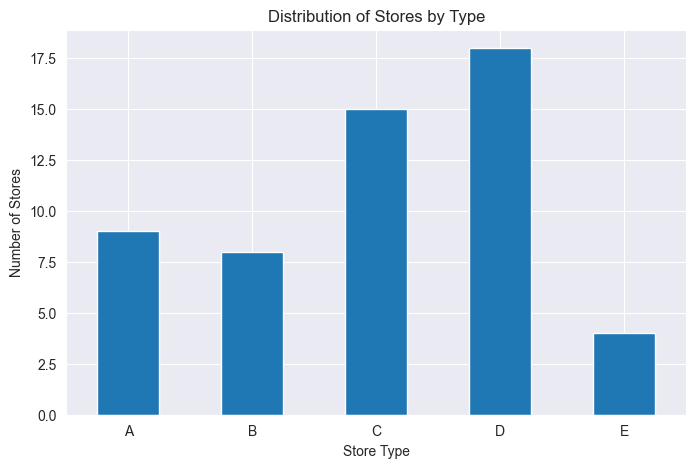

In [135]:

store_counts = stores['type'].value_counts().sort_index()

plt.figure(figsize=(8,5))
store_counts.plot(kind='bar')
plt.title("Distribution of Stores by Type")
plt.xlabel("Store Type")
plt.ylabel("Number of Stores")
plt.xticks(rotation=0)
plt.show()


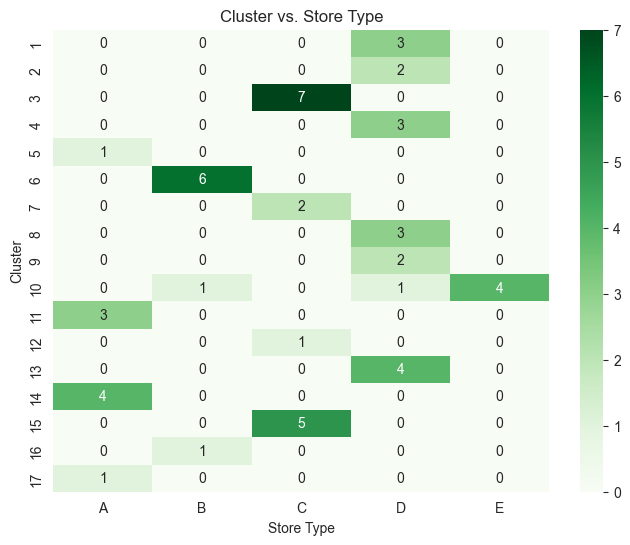

In [136]:


cluster_type_ct = pd.crosstab(stores['cluster'], stores['type'])
plt.figure(figsize=(8,6))
sns.heatmap(cluster_type_ct, annot=True, fmt="d", cmap="Greens")
plt.title("Cluster vs. Store Type")
plt.ylabel("Cluster")
plt.xlabel("Store Type")
plt.show()


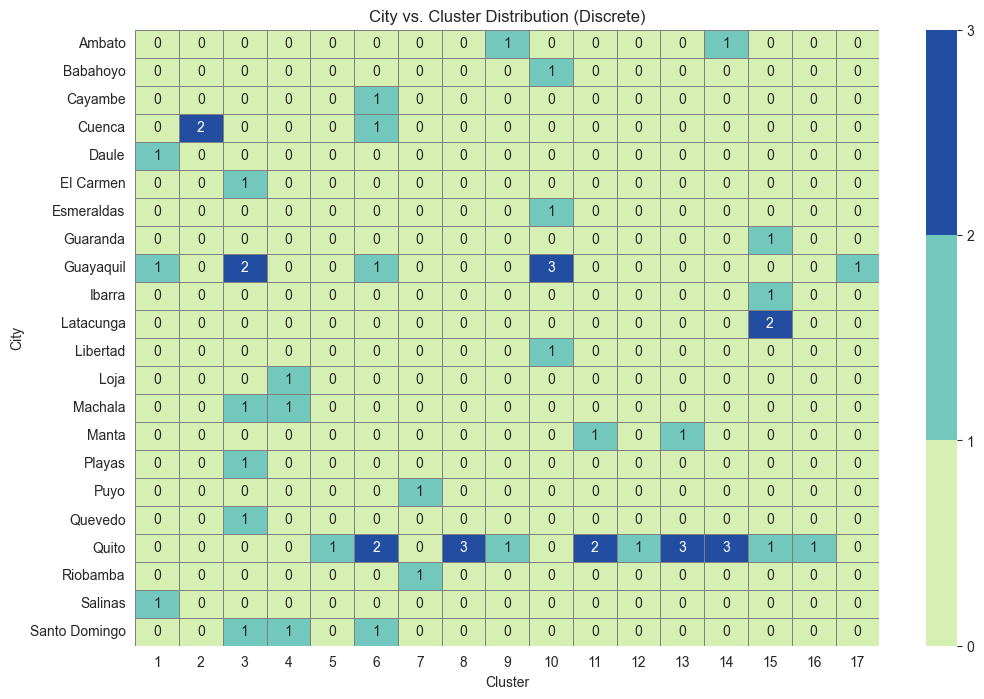

In [137]:


city_cluster_ct = pd.crosstab(stores['city'], stores['cluster'])

values = range(int(city_cluster_ct.values.max()) + 1)
cmap = ListedColormap(sns.color_palette("YlGnBu", len(values)))
norm = BoundaryNorm(values, cmap.N)

plt.figure(figsize=(12,8))
sns.heatmap(
    city_cluster_ct,
    cmap=cmap,
    norm=norm,
    cbar=True,
    linewidths=0.5,
    linecolor="gray",
    annot=True, fmt="d"
)
plt.title("City vs. Cluster Distribution (Discrete)")
plt.ylabel("City")
plt.xlabel("Cluster")
plt.show()


#### transaction


In [138]:
transaction_df = pd.read_csv("transactions.csv",
                          names=["date", "store_nbr", "transaction" ],
                          header=0, parse_dates=["date"])

print("=== Head: ===")
print(transaction_df.head())

print("=== Info: ===")
print(transaction_df.info())

print("=== Description: ===")
print(transaction_df.describe())

=== Head: ===
        date  store_nbr  transaction
0 2013-01-01         25          770
1 2013-01-02          1         2111
2 2013-01-02          2         2358
3 2013-01-02          3         3487
4 2013-01-02          4         1922
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         83488 non-null  datetime64[ns]
 1   store_nbr    83488 non-null  int64         
 2   transaction  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None
=== Description: ===
                                date     store_nbr   transaction
count                          83488  83488.000000  83488.000000
mean   2015-05-20 16:07:40.866232064     26.939237   1694.602158
min              2013-01-01 00:00:00      1.000000      5.000000
25%              2014-03-27 00:00:00     13.000000   1

In [139]:
# count unique store_nbr
transaction_df['store_nbr'].nunique()

54

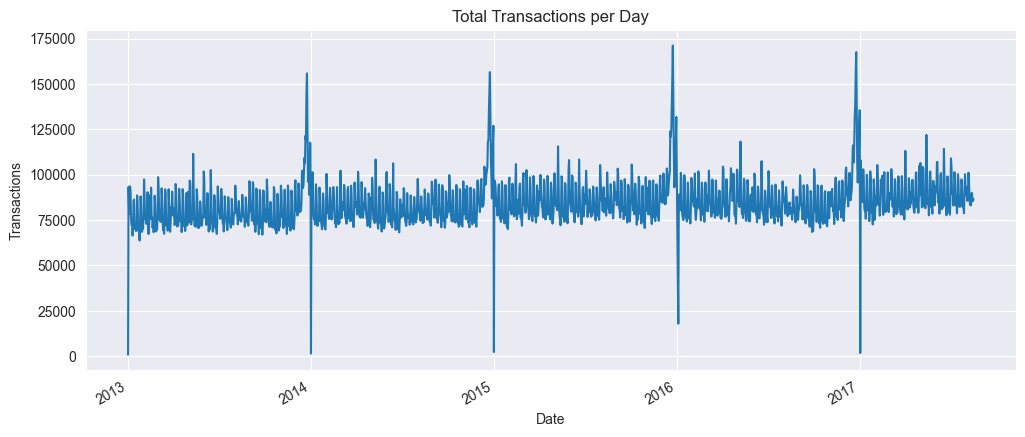

In [140]:
transactions_per_day = transaction_df.groupby('date')['transaction'].sum()


plt.figure(figsize=(12,5))
transactions_per_day.plot()
plt.title("Total Transactions per Day")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.show()

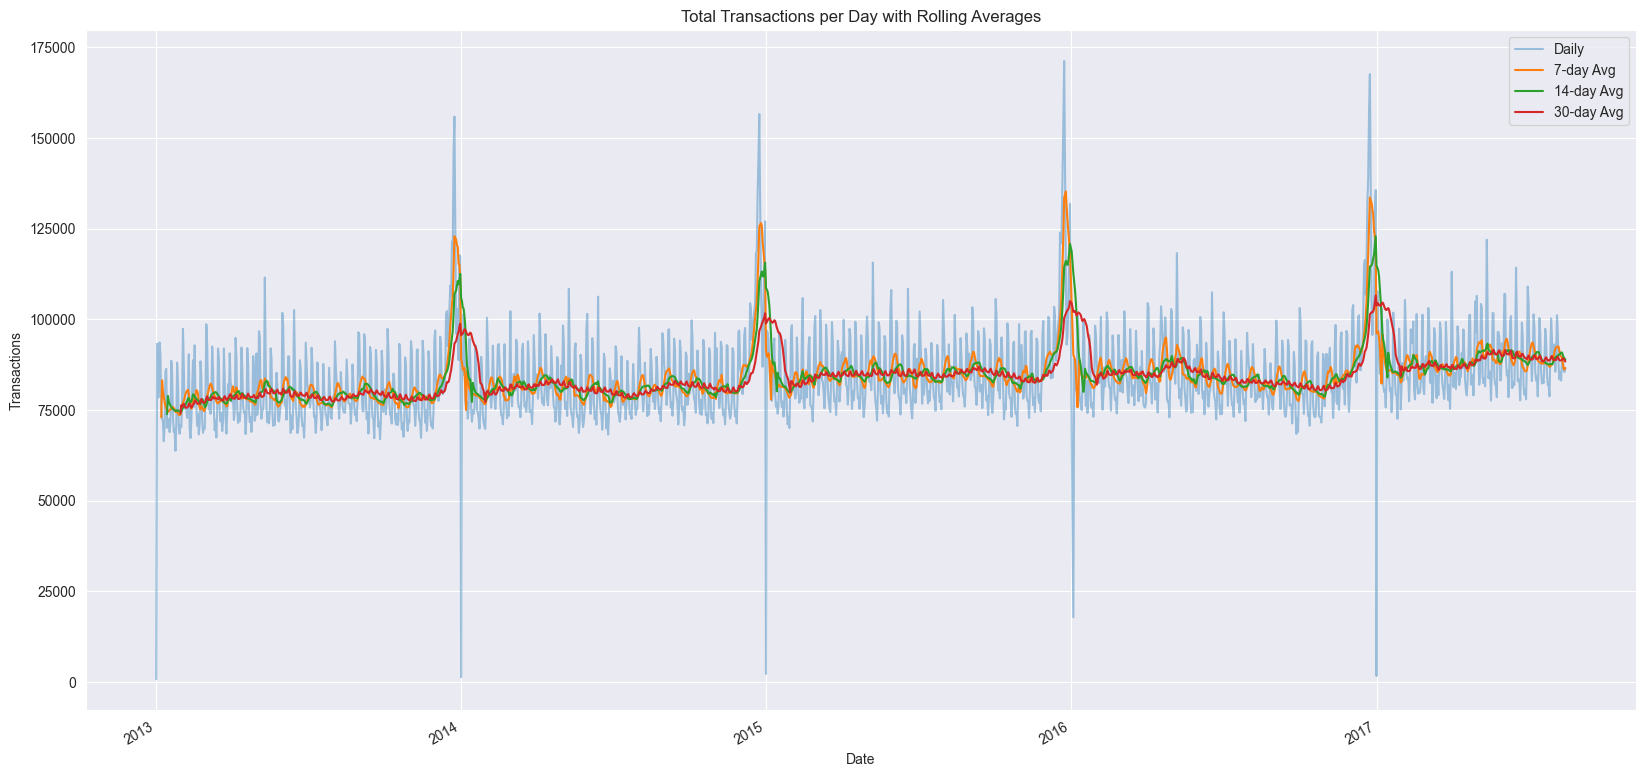

In [141]:
plt.figure(figsize=(20,10))
transactions_per_day.plot(alpha=0.4, label="Daily")
transactions_per_day.rolling(7).mean().plot(label="7-day Avg")
transactions_per_day.rolling(14).mean().plot(label="14-day Avg")
transactions_per_day.rolling(30).mean().plot(label="30-day Avg")
plt.title("Total Transactions per Day with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.legend()
plt.show()


#### Train/ Test

In [142]:
train_df = pd.read_csv("train.csv",
                          names=["id", "date", "store_nbr", "family","sales", "onpromotion" ],
                          header=0, parse_dates=["date"])

print("=== Head: ===")
print(train_df.head())

print("=== Info: ===")
print(train_df.info())

print("=== Description: ===")
print(train_df.describe())

=== Head: ===
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
=== Info: ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
=== Description: ===
                 id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.00088

In [143]:
train_df['family'].nunique()

33

In [144]:
# missing values
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

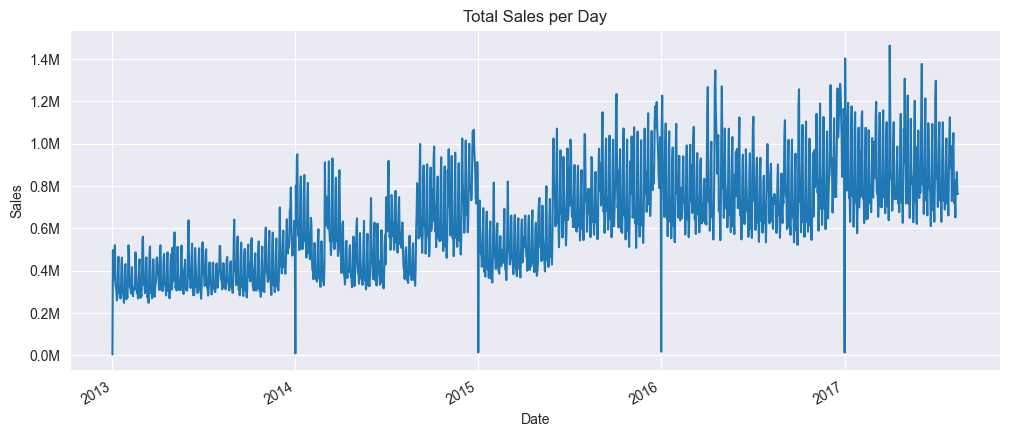

In [145]:

daily_sales = train_df.groupby('date')['sales'].sum()

plt.figure(figsize=(12,5))
ax = daily_sales.plot()

# values into millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{float(x/1e6)}M'))

plt.title("Total Sales per Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()



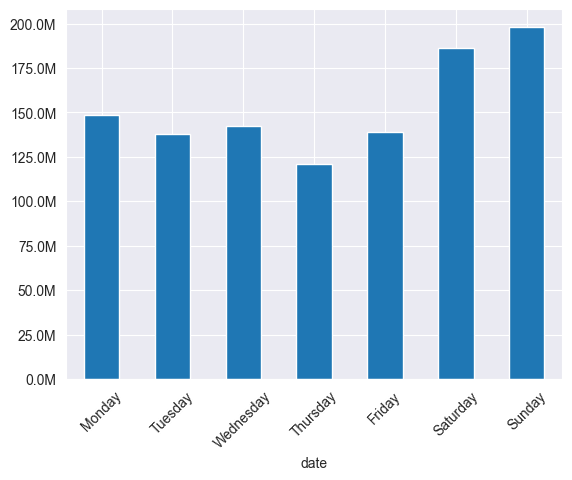

In [146]:

weekday_sales = train_df.groupby(train_df['date'].dt.day_name())['sales'].sum()

# define order fpr weekdays
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.reindex(order)

# values into millions
ax = weekday_sales.plot.bar()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{float(x/1e6)}M'))
ax.xaxis.set_tick_params(rotation=45)


### 1.1.b Identifiy missing data and outliers

#### missing data

In [147]:
# Missing oil
print("=== How much NAs per Col: ===")
print(oil_df.isnull().sum())

=== How much NAs per Col: ===
date          0
oil_price    43
dtype: int64


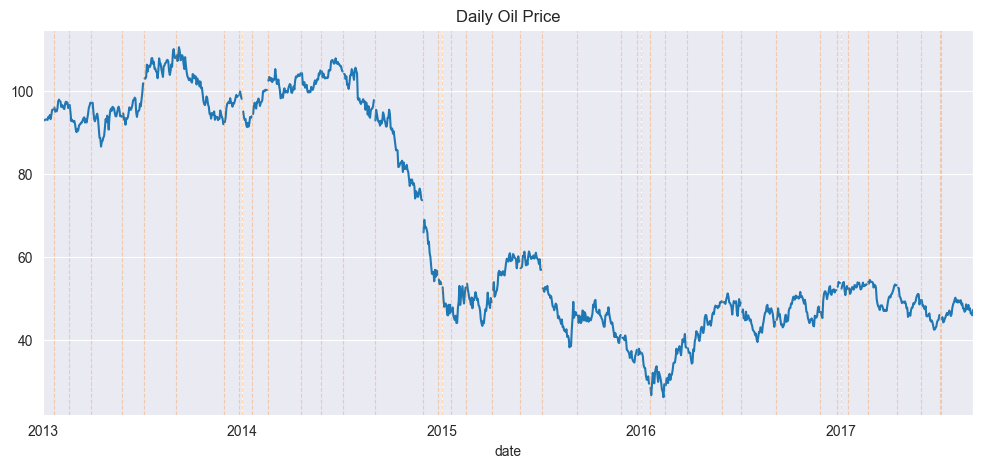

In [148]:
# Visualization to missing oil data:
import matplotlib.pyplot as plt
s = oil_df.set_index("date")["oil_price"]

fig, ax = plt.subplots(figsize=(12,5))
s.plot(ax=ax)

for x in s.index[s.isna()]:
    ax.axvline(x, linestyle="--", linewidth=0.8, alpha=0.3, color="tab:orange")

ax.set_title("Daily Oil Price")
plt.show()

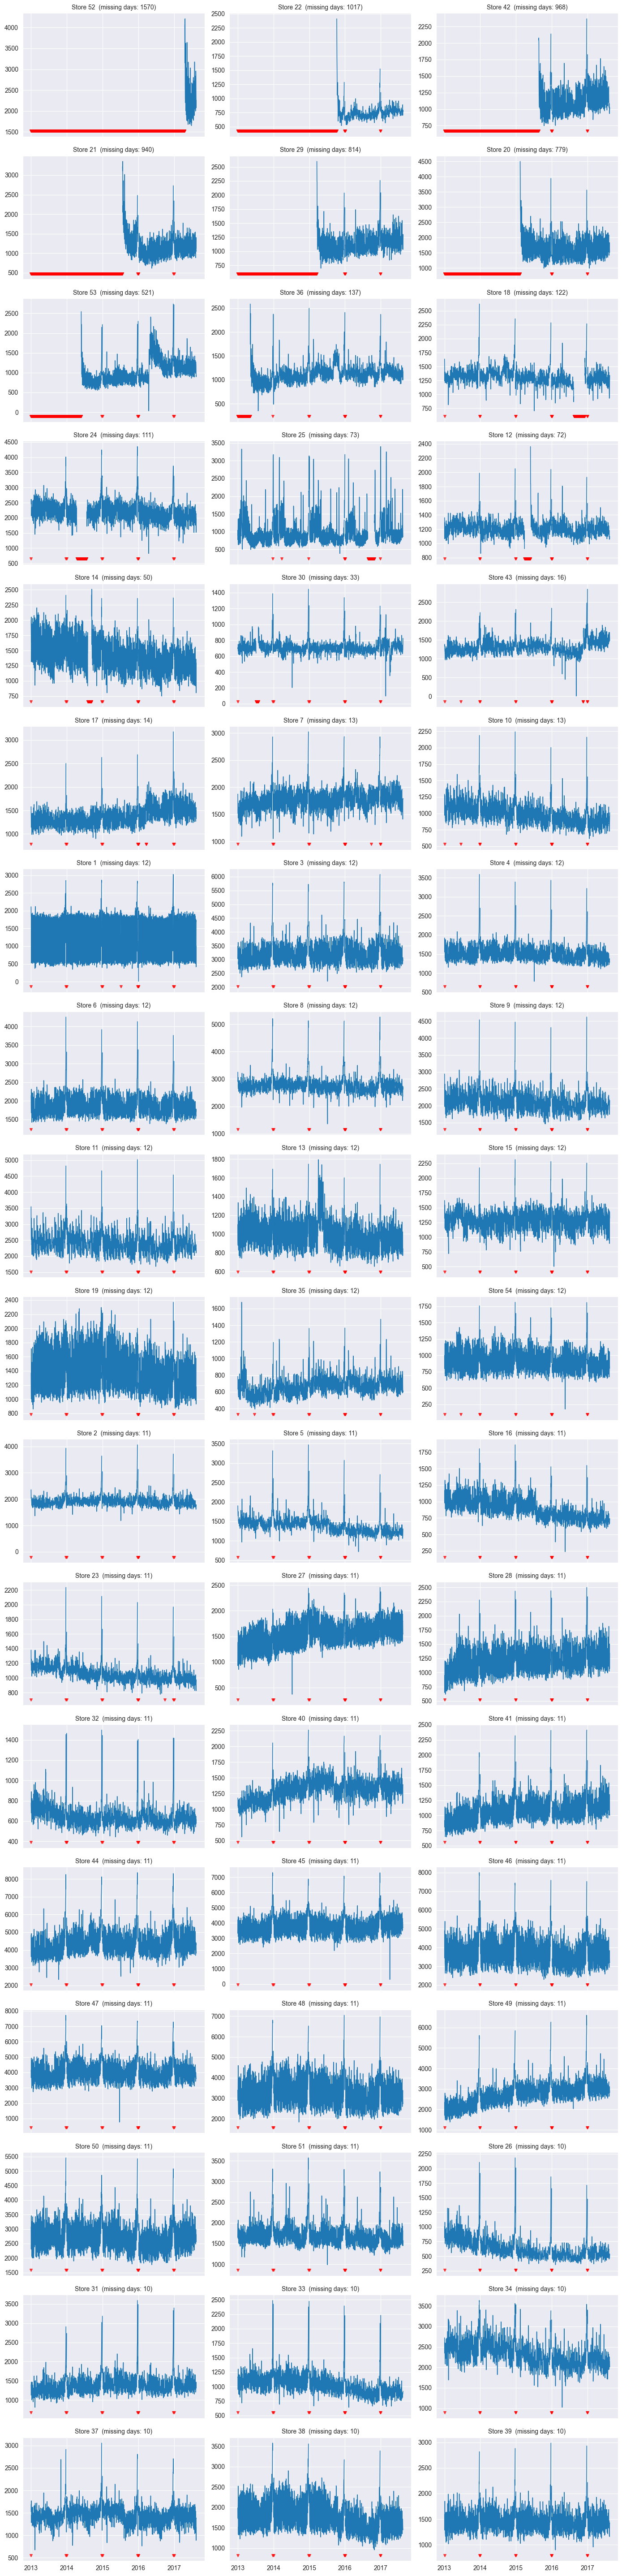

In [149]:
tpd = (transaction_df
       .groupby(['store_nbr', 'date'], as_index=False)['transaction']
       .sum()
       .sort_values(['store_nbr', 'date']))
tpd['date'] = pd.to_datetime(tpd['date']).dt.normalize()


full_idx = pd.date_range(tpd['date'].min(), tpd['date'].max(), freq='D')


dates_by_store = tpd.groupby('store_nbr')['date'].unique()
missing_counts = {s: len(full_idx.difference(pd.DatetimeIndex(dates)))
                  for s, dates in dates_by_store.items()}
stores_with_gaps = [s for s, cnt in missing_counts.items() if cnt > 0]

stores_to_plot = sorted(stores_with_gaps, key=lambda s: missing_counts[s], reverse=True)

# Subplots
n = len(stores_to_plot)
cols = 3 if n > 1 else 1
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 3.2*rows), sharex=True)
axes = axes.flatten() if n > 1 else [axes]

for ax, s in zip(axes, stores_to_plot):
    sdf = (tpd[tpd['store_nbr'] == s]
           .set_index('date')
           .reindex(full_idx))
    ax.plot(sdf.index, sdf['transaction'], linewidth=1.1)
    # NA-days marked
    miss = sdf['transaction'].isna()
    if miss.any():
        ymin, ymax = ax.get_ylim()
        ax.scatter(sdf.index[miss], [ymin]*miss.sum(), marker='v', s=16, alpha=0.7, color="red")
    ax.set_title(f"Store {s}  (missing days: {missing_counts[s]})", fontsize=10)

for ax in axes[n:]:
    ax.axis('off')

fig.tight_layout()
plt.show()


Most stores have 10-12 days missing around Christmas/ New Year, but some stores have a lot more missing data.

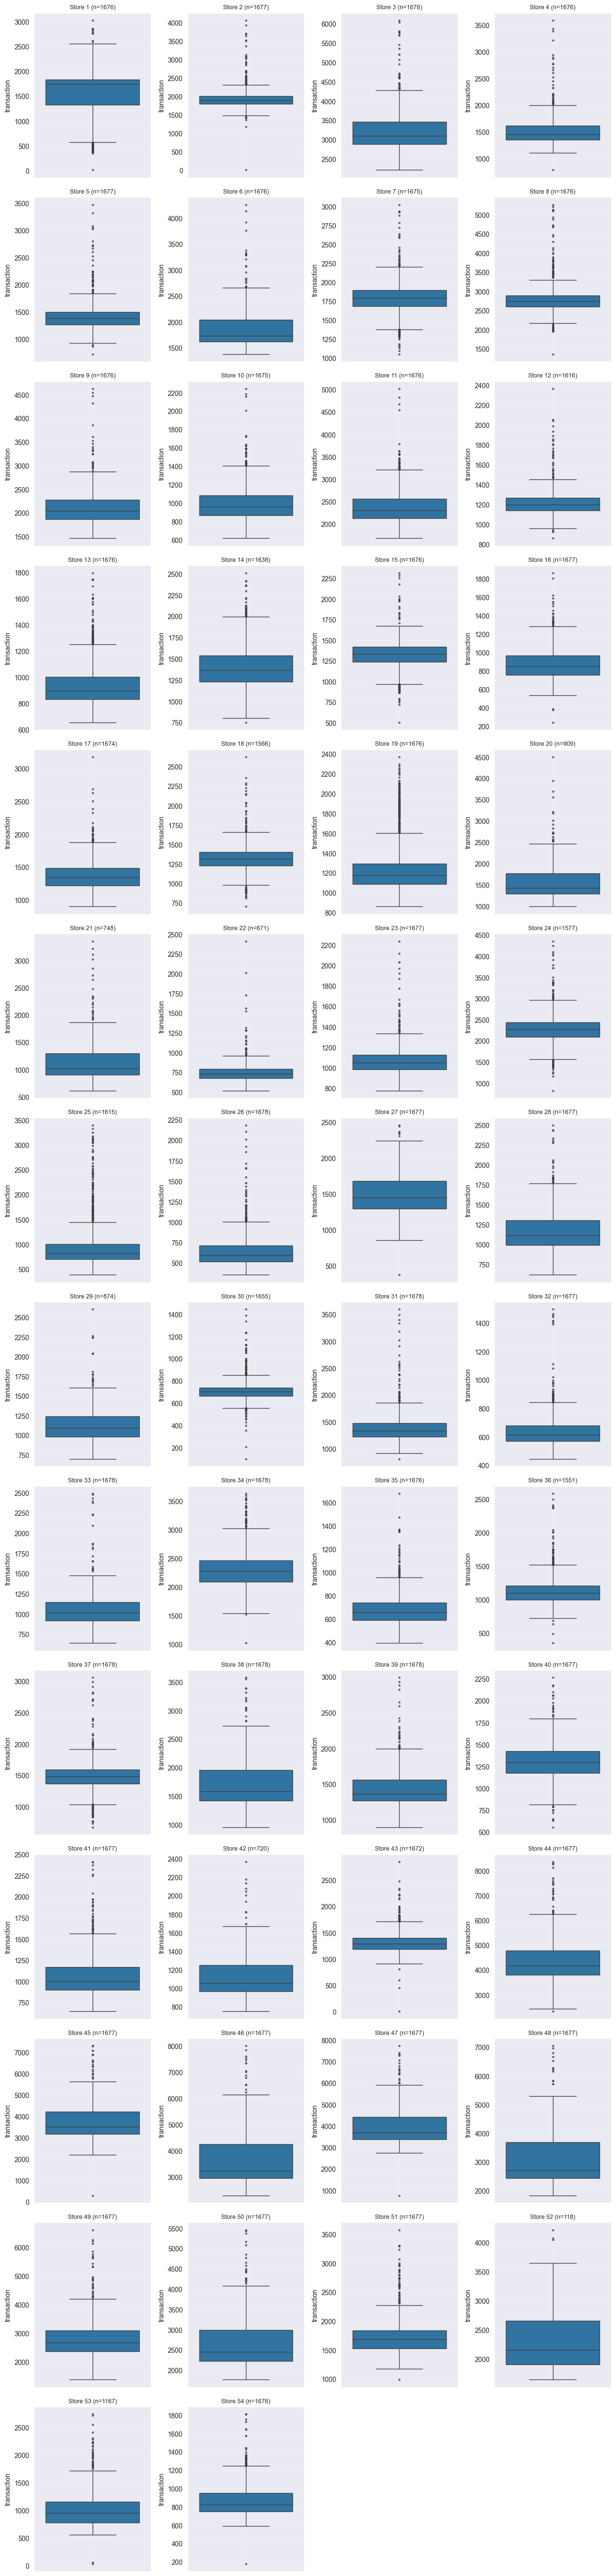

In [150]:
tpd_df = transaction_df.copy()
tpd_df['date'] = pd.to_datetime(tpd_df['date']).dt.normalize()

tpd = (tpd_df
       .groupby(['store_nbr', 'date'], as_index=False)['transaction']
       .sum()
       .sort_values(['store_nbr', 'date']))


stores_to_plot = sorted(tpd['store_nbr'].unique().tolist())


n = len(stores_to_plot)
cols = 4 if n >= 12 else 3 if n >= 6 else 2 if n > 1 else 1
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(3.2*cols, 3.8*rows))
axes = axes.flatten() if n > 1 else [axes]

for ax, store in zip(axes, stores_to_plot):
    svals = tpd.loc[tpd['store_nbr'] == store, 'transaction']
    sns.boxplot(y=svals, ax=ax, fliersize=2)
    ax.set_title(f"Store {store} (n={svals.notna().sum()})", fontsize=9)
    ax.grid(True, alpha=0.2)

for ax in axes[len(stores_to_plot):]:
    ax.axis('off')

fig.tight_layout()
plt.show()


Looks like there are outliers in every store transaction.

# 2 Data Cleaning
    a. Handling Missing Values
    b. Choose appropriate methods to handle missing values (e.g., mean/median imputation for numerical data, mode imputation for categorical data, or deletion of rows/columns).
    c. Justify your choices for handling missing data.

# 3 Handling Outliers
    a. Detect outliers using methods such as the IQR method or Z-score.
    b. Decide whether to remove, cap, or transform the outliers. Justify your decisions.

# 4 Data Transformation
    a. Encoding Categorical Data
        i. Apply label encoding or one-hot encoding to transform categorical data into numerical form.
        ii. Justify your choice of encoding method.
    b. Feature Scaling
        i. Apply feature scaling techniques such as normalization (Min-Max scaling) or standardization (Z-score normalization) to the dataset.
        ii. Explain why feature scaling is necessary and how it impacts the model.


Holiday_events Dataset


In [154]:
num_categorie = holidays_df.nunique()
print(num_categorie)

holidays_df = pd.get_dummies(holidays_df, columns=['local'], prefix='local')
le = LabelEncoder()

holidays_df['transferred_encoded'] = le.fit_transform(holidays_df['transferred'])


holidays_df = pd.get_dummies(holidays_df, columns=['type'], prefix='type')
print(holidays_df.head())

date           312
type             6
local            3
local-name      24
description    103
transferred      2
dtype: int64
        date local-name                    description  transferred  \
0 2012-03-02      Manta             Fundacion de Manta        False   
1 2012-04-01   Cotopaxi  Provincializacion de Cotopaxi        False   
2 2012-04-12     Cuenca            Fundacion de Cuenca        False   
3 2012-04-14   Libertad      Cantonizacion de Libertad        False   
4 2012-04-21   Riobamba      Cantonizacion de Riobamba        False   

   local_Local  local_National  local_Regional  transferred_encoded  \
0         True           False           False                    0   
1        False           False            True                    0   
2         True           False           False                    0   
3         True           False           False                    0   
4         True           False           False                    0   

   type_Additional 

Label encoding was applied to the transferred column because it is a binary feature, and label encoding is well-suited for columns with only two categories. One-hot encoding was applied to the local and type columns to avoid introducing any artificial ordinal relationships. Using label encoding for local could potentially mislead certain machine learning algorithms, such as Decision Tree, into interpreting a nonexistent order among the categories, which might affect model performance.

# 5 Data Splitting
    a. Split the preprocessed dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.
    b. Explain the importance of splitting the data and how it prevents overfitting.

# 6 Bonus
Apply dimensionality reduction techniques such as Principal
Component Analysis (PCA) and discuss how it affects the dataset.